In [1]:
import numpy as np
import PIL
from PIL import Image
from PIL import ImageDraw

In [2]:
## Find the endpoint of a line segment with given start coordinate (x,y), angle (in radians) and distance
### returns endpoint with x and y values rounded to (closest?) integer, optional argument if angle given in degrees
def line_segment_endpoint(coord, angle, dist, degrees = False):
    if degrees == True:
        angle = angle * np.pi/180
        return (int(dist*np.cos(angle) + coord[0]), int(dist*np.sin(angle) + coord[1]))
    else:
        return (int(dist*np.cos(angle) + coord[0]), int(dist*np.sin(angle) + coord[1]))

In [3]:
def dist(p1,p2):
    dist = np.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)
    return dist

In [4]:
##
def midpoint(p1,p2):
    return (int(p2[0]+p1[0]/2), int(p2[1]+p1[1]/2))

In [5]:
def find_thrips(p1,p2):
    a = ( int((1/3)*(p2[0]-p1[0])+p1[0]) , int((1/3)*(p2[1]-p1[1])+p1[1]))
    b = ( int((2/3)*(p2[0]-p1[0])+p1[0]) , int((2/3)*(p2[1]-p1[1])+p1[1]))
    
    #Find angle between b and a
    if (b[1] >= a[1]):
        theta = np.arccos((b[0]-a[0])/dist(a,b))*180/np.pi
    else:
        theta = 360 - np.arccos((b[0]-a[0])/dist(a,b))*180/np.pi
    
    c = line_segment_endpoint(a, 60+theta, (1/3)*dist(p1,p2), degrees = True)
    return (a,c,b)

In [6]:
## drawable must be of type PIL.ImageDraw.Draw(image)
## thrips is a list of 3-tuples containing a trio of coordinates
## iterations is an integer

def koch_triangle(drawable, thrips, color, width, iterations):
    if len(thrips[0]) == 2:
        try:
            if iterations == 0:
                return "Done"
            else:
                tri_list = []
                for thrip in thrips:
                    tri = find_thrips(thrip[0],thrip[1])
                    tri_list.append(tri)
                    drawable.line([thrip[0],thrip[1]], color, width)
            return koch_triangle(drawable, tri_list, color, width, iterations-1)
        except:
            return "Done"
    else:
        try:
            if iterations == 0:
                return "Done"
            else:
                tri_list = []
                for thrip in thrips:
                    tri = find_thrips(thrip[0],thrip[1])
                    tri_list.append(tri)
                    drawable.line([thrip[0],thrip[1]], color, width)
                    tri = find_thrips(thrip[1],thrip[2])
                    tri_list.append(tri)
                    drawable.line([thrip[1],thrip[2]], color, width)
            return koch_triangle(drawable, tri_list, color, width, iterations-1)
        except:
            return "Done"

<ipython-input-5-4f654d303704>:6: RuntimeWarning: invalid value encountered in double_scalars
  theta = np.arccos((b[0]-a[0])/dist(a,b))*180/np.pi


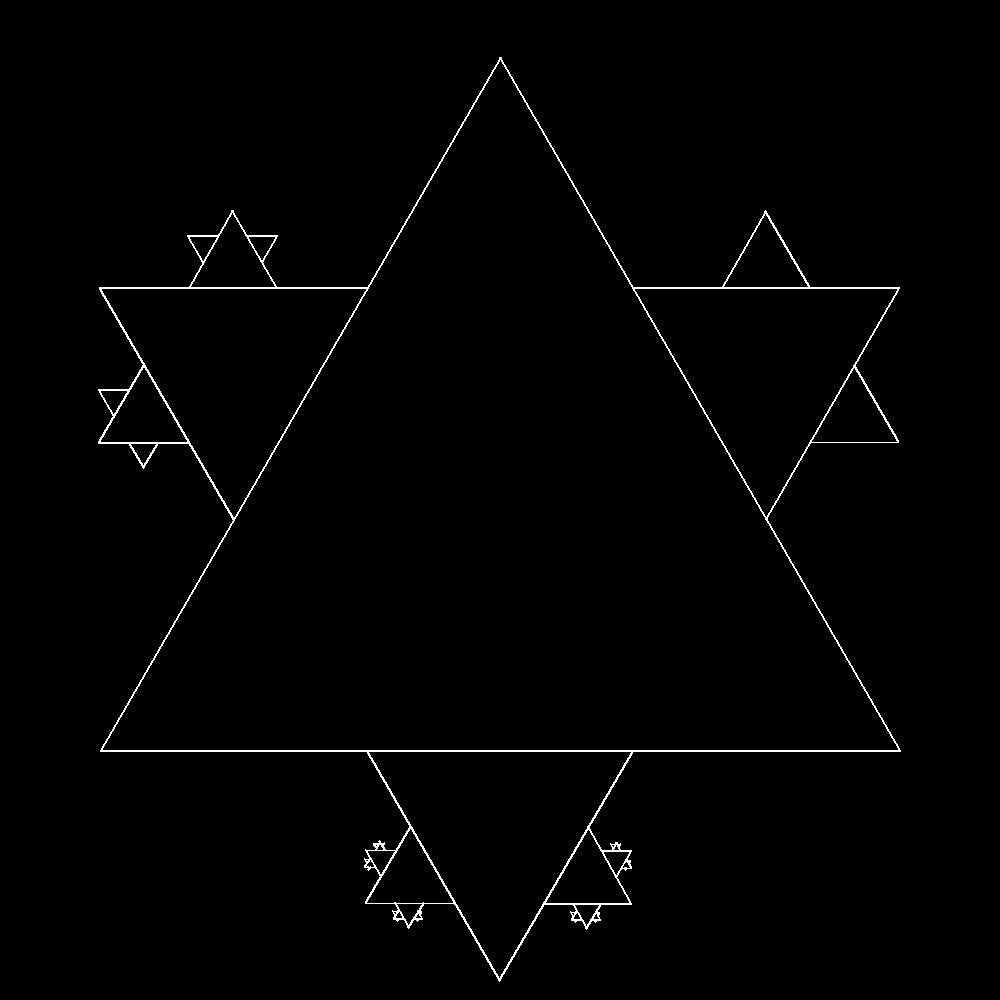

In [7]:
image = Image.new("RGBA", (1000,1000), (0,0,0,255))
draw = ImageDraw.Draw(image)
koch_triangle(draw, [((100,750),(900,750))], (255,255,255,255), 2, 10)
koch_triangle(draw, [((900,750),(500,57))], (255,255,255,255), 2, 3)
koch_triangle(draw, [((500,57),(100,750))], (255,255,255,255), 2, 4)
image

In [8]:
image.save("koch_full.png")

<ipython-input-5-4f654d303704>:6: RuntimeWarning: invalid value encountered in double_scalars
  theta = np.arccos((b[0]-a[0])/dist(a,b))*180/np.pi


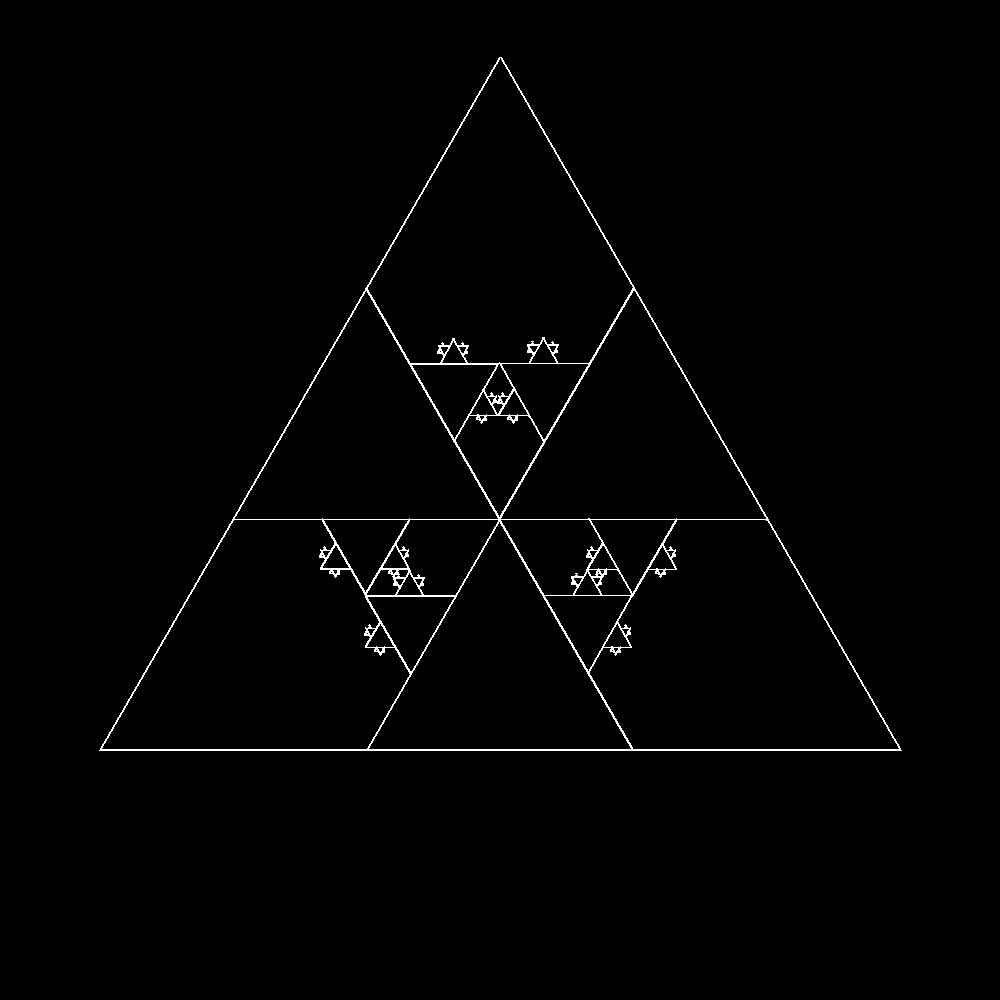

In [9]:
image = Image.new("RGBA", (1000,1000), (0,0,0,255))
draw = ImageDraw.Draw(image)
koch_triangle(draw, [((900,750),(100,750))], (255,255,255,255), 2, 10)
koch_triangle(draw, [((500,57),(900,750))], (255,255,255,255), 2, 10)
koch_triangle(draw, [((100,750),(500,57))], (255,255,255,255), 2, 10)
image

In [10]:
image.save("inverted_koch.png")

In [11]:
## drawable must be of type PIL.ImageDraw.Draw(image)
## thrips is a list of 3-tuples containing a trio of coordinates
## iterations is an integer


###################### NOT WORKING AS INTENDED #######################################

def shaded_koch_triangle(drawable, thrips, color, width, iterations):
    try:
        if iterations == 0:
            return "Done"
        else:
            tri_list = []
            for thrip in thrips:
                tri = find_thrips(thrip[0],thrip[1])
                tri_list.append(tri)
                tri = find_thrips(thrip[1],thrip[2])
                tri_list.append(tri)
                drawable.polygon([thrip[0],thrip[1],thrip[2]], fill = color, outline = color)
                return koch_triangle(drawable, tri_list, color, width, iterations-1)
    except:
            return "Done"

<ipython-input-5-4f654d303704>:6: RuntimeWarning: invalid value encountered in double_scalars
  theta = np.arccos((b[0]-a[0])/dist(a,b))*180/np.pi


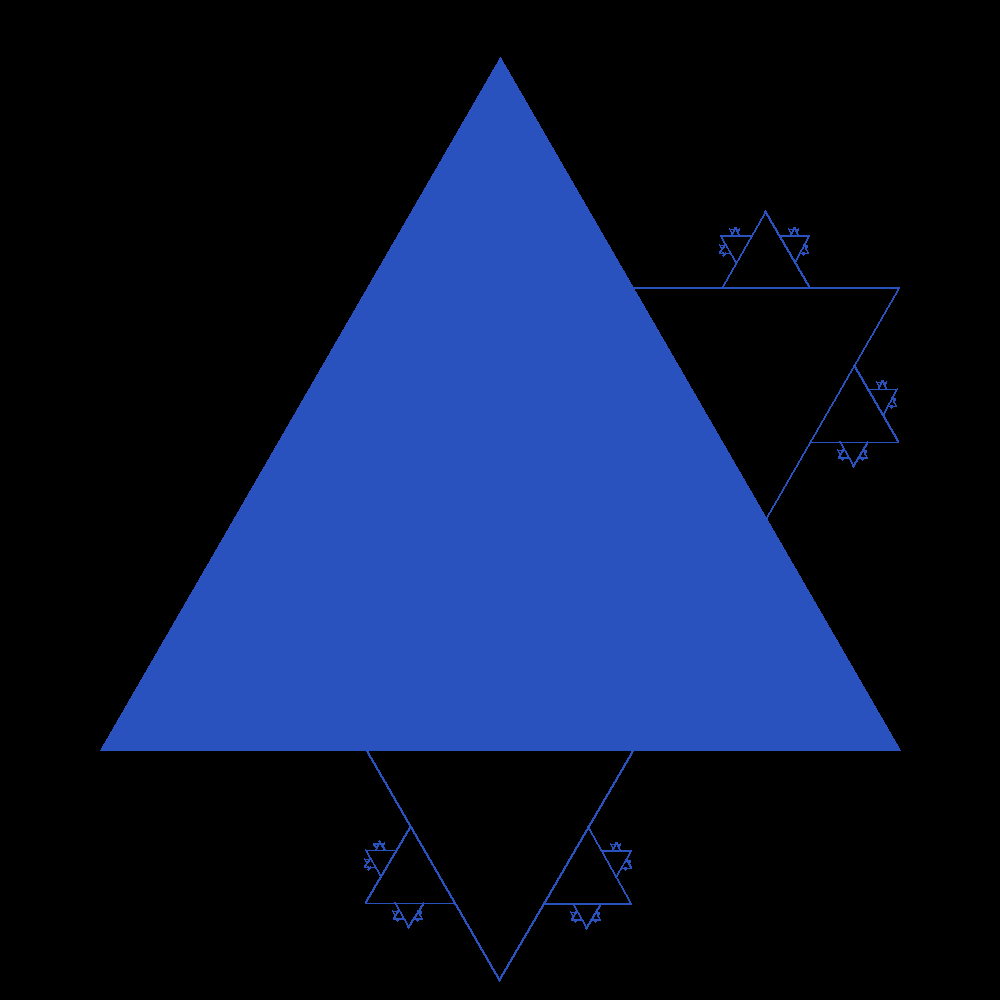

In [12]:
new_image = Image.new("RGBA", (1000,1000), (0,0,0,255))
draw = ImageDraw.Draw(new_image)
shaded_koch_triangle(draw, [((100,750),(900,750),(500,57))], (42,82,190,255), 2, 7)
#shaded_koch_triangle(draw, [((900,750),(500,57))], (42,82,190,255), 2, 6)
#shaded_koch_triangle(draw, [((500,57),(100,750))], (42,82,190,255), 2, 6)
new_image

In [13]:
def filled_koch_triangle(drawable, thrips, color, width, iterations):
    try:
        if iterations == 0:
            return "Done"
        tri_list = []
        new_color = (color[0]-10, color[1]-10, color[2]-10)
        print(new_color)
        for thrip in thrips:
            tri = find_thrips(thrip[0],thrip[1])
            tri_list.append(tri)
            tri = find_thrips(thrip[1],thrip[2])
            tri_list.append(tri)
            tri = find_thrips(thrip[2],thrip[0])
            tri_list.append(tri)
            drawable.polygon([thrip[0],thrip[1],thrip[2]], new_color, new_color)
        return filled_koch_triangle(drawable, tri_list, new_color, width, iterations-1)
    except:
        return "Done"

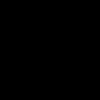

In [14]:
image = Image.new("RGBA", (100,100), (0,0,0,255))
image

(32, 72, 180)
(22, 62, 170)
(12, 52, 160)
(2, 42, 150)
(-8, 32, 140)
(-18, 22, 130)


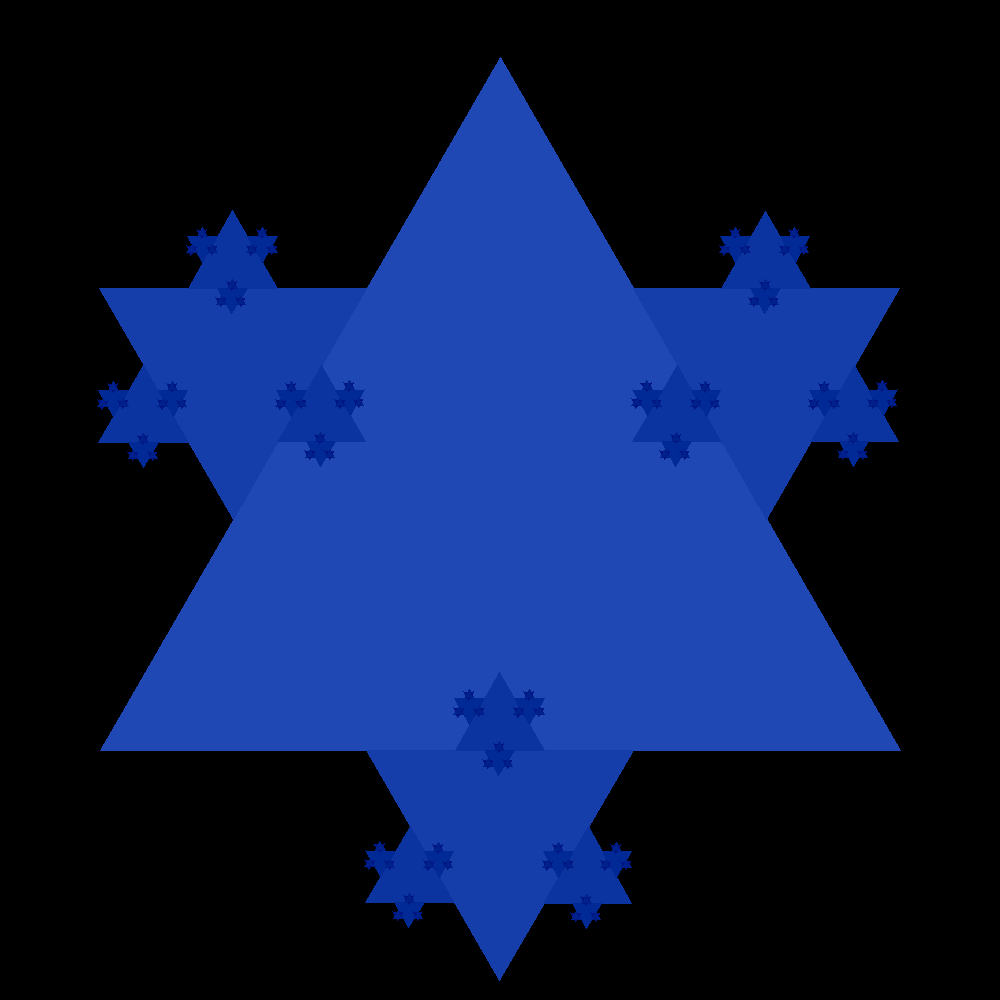

In [15]:
image = Image.new("RGBA", (1000,1000), (0,0,0,255))
draw = ImageDraw.Draw(image)
filled_koch_triangle(draw, [((100,750),(900,750),(500,57))], (42,82,190,255), 2, 6)
image

In [31]:
image.save("koch_shading_1.png")

In [16]:
def find_fips(p1,p2):
    a = ( int((1/3)*(p2[0]-p1[0])+p1[0]) , int((1/3)*(p2[1]-p1[1])+p1[1]))
    b = ( int((2/3)*(p2[0]-p1[0])+p1[0]) , int((2/3)*(p2[1]-p1[1])+p1[1]))
    
    if (b[1] >= a[1]):
        theta = np.arccos((b[0]-a[0])/dist(a,b))*180/np.pi
    else:
        theta = 360 - np.arccos((b[0]-a[0])/dist(a,b))*180/np.pi
    
    c = line_segment_endpoint(a, 60+theta, (1/3)*dist(p1,p2), degrees = True)
    return (p1,a,c,b,p2)

In [17]:
def filled_koch_triangle(drawable, fips, color, width, iterations):
    try:
        if iterations == 0:
            return "Done"
        fip_list = []
        new_color = (color[0]-10, color[1]-10, color[2]-10)
        #print(new_color)
        for fip in fips:
            #print(fip)
            tri = find_fips(fip[0],fip[1])
            #print(tri)
            fip_list.append(tri)
            tri = find_fips(fip[1],fip[2])
            fip_list.append(tri)
            tri = find_fips(fip[2],fip[3])
            fip_list.append(tri)
            tri = find_fips(fip[3],fip[1])
            fip_list.append(tri)
            tri = find_fips(fip[3],fip[4])
            fip_list.append(tri)
            drawable.polygon([fip[1],fip[2],fip[3]], new_color, new_color)
        return filled_koch_triangle(drawable, fip_list, new_color, width, iterations-1)
    except:
        return "Done"

<ipython-input-16-b90068ba1af8>:6: RuntimeWarning: invalid value encountered in double_scalars
  theta = np.arccos((b[0]-a[0])/dist(a,b))*180/np.pi


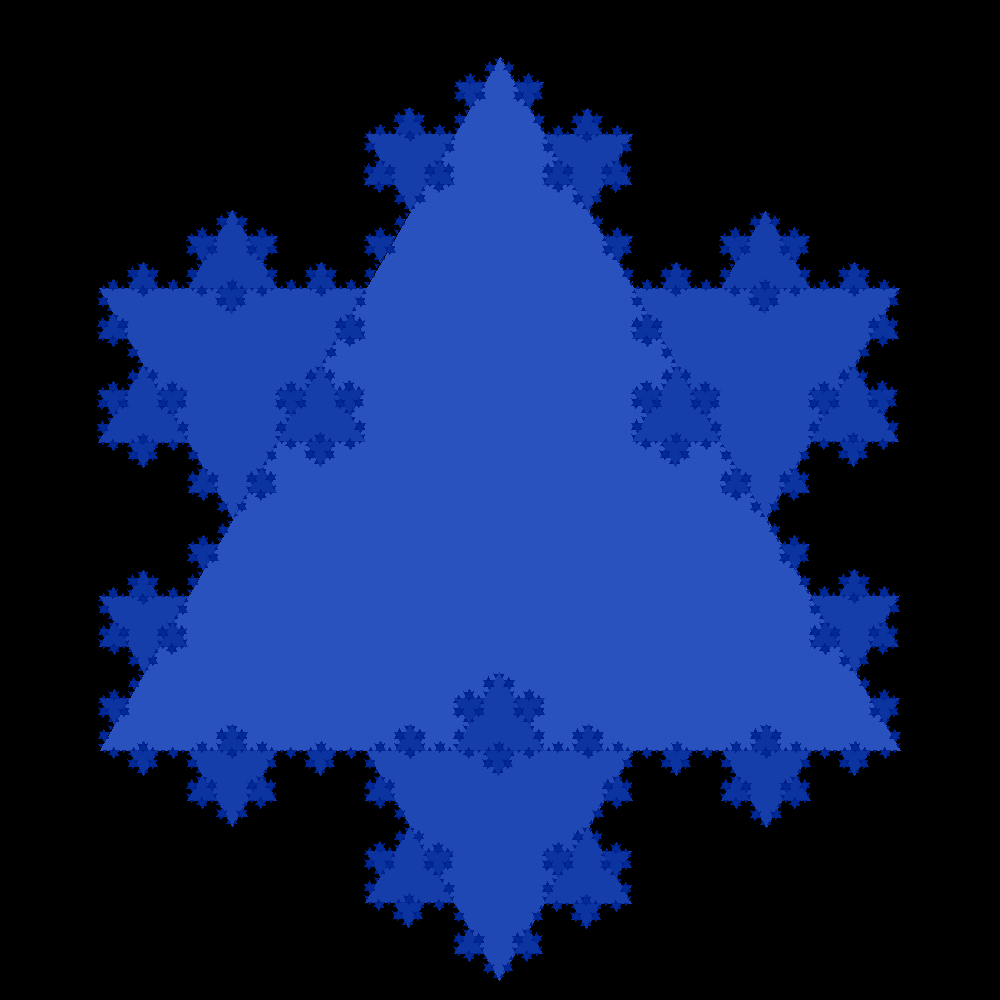

In [18]:
image = Image.new("RGBA", (1000,1000), (0,0,0,255))
draw = ImageDraw.Draw(image)
draw.polygon([(100,750),(900,750), (500,57)],(42,82,190,255), (42,82,190,255))
filled_koch_triangle(draw, [find_fips((100,750),(900,750))], (42,82,190,255), 2, 6)
filled_koch_triangle(draw, [find_fips((900,750),(500,57))], (42,82,190,255), 2, 6)
filled_koch_triangle(draw, [find_fips((500,57),(100,750))], (42,82,190,255), 2, 6)
image

In [64]:
image.save("ultimate_koch_shading.png")

<ipython-input-16-b90068ba1af8>:6: RuntimeWarning: invalid value encountered in double_scalars
  theta = np.arccos((b[0]-a[0])/dist(a,b))*180/np.pi


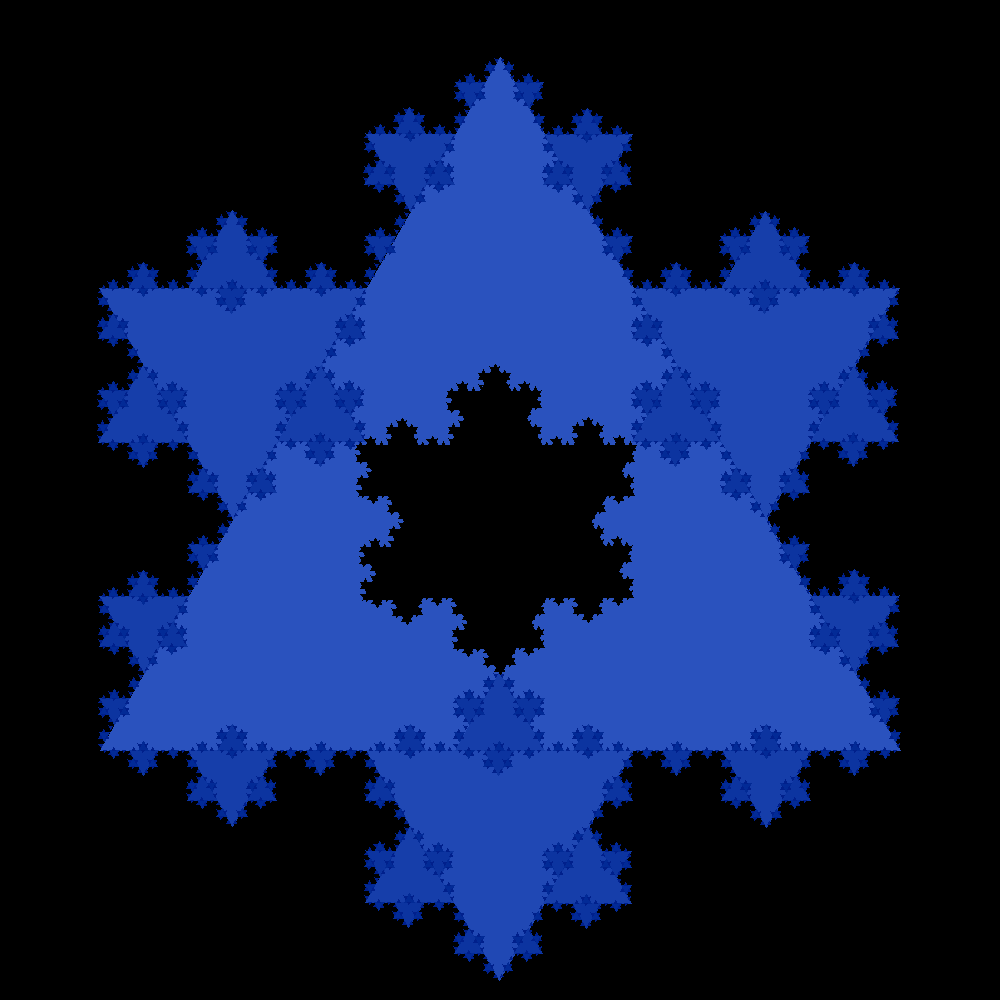

In [19]:
image = Image.new("RGBA", (1000,1000), (0,0,0,255))
draw = ImageDraw.Draw(image)
draw.polygon([(100,750),(900,750), (500,57)],(42,82,190,255), (42,82,190,255))
filled_koch_triangle(draw, [find_fips((100,750),(900,750))], (42,82,190,255), 2, 6)
filled_koch_triangle(draw, [find_fips((900,750),(500,57))], (42,82,190,255), 2, 6)
filled_koch_triangle(draw, [find_fips((500,57),(100,750))], (42,82,190,255), 2, 6)
draw.polygon([(500,674),(636,445), (356,445)],(0,0,0,255), (0,0,0,255))
filled_koch_triangle(draw, [find_fips((500,674),(636,445))], (0,0,0,255), 2, 6)
filled_koch_triangle(draw, [find_fips((636,445),(356,445))], (0,0,0,255), 2, 6)
filled_koch_triangle(draw, [find_fips((356,445),(500,674))], (0,0,0,255), 2, 6)
image

In [20]:
image.save("koch_mid_flake.png")